# Influenza Vaccine/Genetics Analysis

---

This year while herding my children through the flu tent line, I overhear talk that gets my nerd gears moving. Patients are chatting about whether the shot will work. There was lots of shrugging, combined with “who knows?” as we obediently moved through line to expose our shoulders. 

Worrying about the flu is a valid concern - and as mother of small children, I've never thought twice about getting our shots. Afterall, the vaccine is currently our technology for defense against seasonal flu.


That got me thinking - influeza was discovered early in the last century and the vaccine was created in the before WWII.

**Why, in modern times, are we still concerned about the vaccine’s efficacy every season?**


---

## Some Background

One well understood cause for reduced vaccine efficacy is the time lag between when vaccine strains are chosen and manufactured, and then publicly distributed. This takes months - ample time for influenza to mutate its way out of vaccine formulations. 

Though interestingly, even when matched well to circulating strains, vaccines can still provide low efficacy. A recent paper by [Lewnard and Coby](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6027411/) explains how current vaccine strains cross-react with prior vaccinations and influenza-caused illnesses to either boost or reduce immunological responses. Another finding is that the vaccine just flat out doesn't work on some people. 

One great point that they make is that if mutations were the sole reason for decreased vaccine efficacy, we'd be winning the vaccine game by now. In other words, there are other factors coming into play that we don't yet understand. 

How then to improve our chances of a better working vaccine to defend against the virus? The paper suggests studying the "effect of past influenza exposures on host repsonses to vaccination..." as this will "improve not just seasonal vaccine effectiveness but also predictions of season severity, viral evolution, and the design of universal vaccines..." 

These big picture problems of influenza genetics and how it relates to the vaccine are the inspiration for my mini-analysis that follows.

---

## Project Details

Here I will show how to look at large subsets of data using influenza records from last season. This first part of the analysis will be a general assessment of the data (e.g. demographics, categorizing strains and subtypes), as I often like to get my bearings before figuring out what useful information can be extracted.

A common problem I encounter in my work is combing through massive amounts of data - it can be records, like what I'm going to be working with below, or tons of sequences that I need to investigate for say, a consensus alignment. I figured out pretty early on that Excel wasn't cutting it for investigating 20,000 genetic sequences at once. 

Using Python for data analysis, I'm going to be initially answering:

   ##### 1. What strains were included in the 2017-18 vaccine?
   ##### 2. What subtypes and strains were most common in the US in 2017-18?
   
A follow up on this analysis will answer: 

   ##### 3. How similar were the recommended vaccine strains to the reported sequences during the 2017-18 season?
   

---

# Question 1: What strains were included in the 2017-18 vaccine? 

Early in 2017, the WHO announced its [recommended composition of the influenza vaccine](http://www.who.int/influenza/vaccines/virus/recommendations/2017_18_north/en/): 

* A/Michigan/45/2015 (H1N1)pdm09-like virus
* A/Hong Kong/4801/2014 (H3N2)-like virus
* B/Brisbane/60/2008-like virus
* B/Phuket/3073/2013-like virus (for quadrivalent vaccine)

An expert panel sources and studies recent surveillance data of the virus, clinical antibody studies of currently circulating viruses, and predictive models of genetic/antigenic changes to come up with these recommendations. Each country then formulates their own vaccine based on regional requirements and observations.

Last flu season (2017-18) was severe compared to previous years. The CDC classifed the season as having an overall ["High" severity] across all age groups(https://www.cdc.gov/flu/professionals/classifies-flu-severity.htm). Previous years yielded largely low to moderate seasons. 

What exactly does “High Severity” mean? There are many factors that contribute to this classification, but mainly it’s based on flu-related hospitalizations and deaths. To explore the details further, here are excellent resources/graphs tracking this data: the US monitoring system [FluView](https://gis.cdc.gov/grasp/fluview/fluportaldashboard.html) and the [WHO's FluNet](https://www.who.int/influenza/resources/charts/en/).

---

# Question 2: What strains and subtypes were most common in the US in 2017-18?

Answering questions 2 and 3 will require retreiving records from sequence databases.

#### Data source

The datasets in this project are from the [Influenza Research Database](https://www.fludb.org/brc/home.spg?decorator=influenza), a viral data repository that pulls from [NCBI GenBank](https://www.ncbi.nlm.nih.gov/genbank/) and [NCBI RefSeq](https://www.ncbi.nlm.nih.gov/refseq/).

** Note that this analysis is performed only on the data obtained from the Influenza Research Database. It therefore may not be a complete analysis of the 2017-18 flu season as not all US flu cases may have been reported in this database. 


## Preparing the Dataframes

In [62]:
# Import data analysis libraries 
import numpy as np
import pandas as pd

# Import visualization libraries
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.)
import matplotlib.pyplot as plt
%matplotlib inline 

In [63]:
# Load the flu datasets, read fields by tabs
df_fluA = pd.read_csv('flu_A.tsv', sep='\t')
df_fluB = pd.read_csv('flu_B.tsv', sep='\t')

In [64]:
# Remove spaces in column names in df_fluA and check 
df_fluA.columns = [c.replace(' ', '_') for c in df_fluA.columns]
df_fluA.columns

Index(['Segment', 'Protein_Name', 'Sequence_Accession', 'Complete_Genome',
       'Segment_Length', 'Subtype', 'Collection_Date', 'Host_Species',
       'Country', 'State/Province', 'Flu_Season', 'Strain_Name',
       'Curation_Report', 'Unnamed:_13'],
      dtype='object')

In [65]:
# Remove spaces in column names in df_fluB and check
df_fluB.columns = [c.replace(' ', '_') for c in df_fluB.columns]
df_fluB.columns

Index(['Segment', 'Protein_Name', 'Sequence_Accession', 'Complete_Genome',
       'Segment_Length', 'Subtype', 'Collection_Date', 'Host_Species',
       'Country', 'State/Province', 'Flu_Season', 'Strain_Name',
       'Curation_Report', 'Unnamed:_13'],
      dtype='object')

Since there are two flu types (A and B), I prefer to analyze seperate datasets for each, rather than merging the two dataframes. 

In [66]:
# Let's take a look at the first few rows of data for Flu A
df_fluA.head(3)

,Segment,Protein_Name,Sequence_Accession,Complete_Genome,Segment_Length,Subtype,Collection_Date,Host_Species,Country,State/Province,Flu_Season,Strain_Name,Curation_Report,Unnamed:_13
0,6,NaN,MH083303,Yes,1433,H1N1,01/02/2018,IRD:Human,USA,Alabama,17-18,A/Alabama/01/2018,Pass,NaN
1,4,HA,MH083301,Yes,1752,H1N1,01/02/2018,IRD:Human,USA,Alabama,17-18,A/Alabama/01/2018,Pass,NaN
2,7,"-N/A-,-N/A-",MH083304,Yes,1002,H1N1,01/02/2018,IRD:Human,USA,Alabama,17-18,A/Alabama/01/2018,Pass,NaN


In [67]:
# And here is the first few rows for Flu B
df_fluB.head(10)

,Segment,Protein_Name,Sequence_Accession,Complete_Genome,Segment_Length,Subtype,Collection_Date,Host_Species,Country,State/Province,Flu_Season,Strain_Name,Curation_Report,Unnamed:_13
0,2,PB2,MH135882,Yes,2367,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
1,3,PA,MH135884,Yes,2276,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
2,5,NP,MH135886,Yes,1816,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
3,7,"-N/A-,-N/A-",MH135888,Yes,1155,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
4,8,"-N/A-,-N/A-",MH135889,Yes,1060,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
5,6,"-N/A-,-N/A-",MH135887,Yes,1530,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
6,4,HA,MH135885,Yes,1853,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
7,1,PB1,MH135883,Yes,2340,-N/A-,01/22/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/02/2018,Pass,NaN
8,7,"-N/A-,-N/A-",MH135896,Yes,1155,-N/A-,02/06/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/03/2018,Pass,NaN
9,5,NP,MH135894,Yes,1816,-N/A-,02/06/2018,IRD:Human,USA,Alabama,17-18,B/Alabama/03/2018,Pass,NaN


---

## Exploring the Data

Now that the data has been properly extracted and converted into dataframes, let's take a closer look at the data.

In [68]:
df_fluA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24407 entries, 0 to 24406
Data columns (total 14 columns):
Segment               24407 non-null int64
Protein_Name          21351 non-null object
Sequence_Accession    24407 non-null object
Complete_Genome       24407 non-null object
Segment_Length        24407 non-null int64
Subtype               24407 non-null object
Collection_Date       24407 non-null object
Host_Species          24407 non-null object
Country               24407 non-null object
State/Province        24407 non-null object
Flu_Season            24407 non-null object
Strain_Name           24407 non-null object
Curation_Report       24407 non-null object
Unnamed:_13           0 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 2.6+ MB


Approximately 24K records, however, there are multiple Host Species: 

In [69]:
df_fluA['Host_Species'].unique()

array(['IRD:Human', 'IRD:Dog', 'IRD:Ruddy Turnstone/Avian', 'IRD:Swine'],
      dtype=object)

I want to look at sequences isolated only from Humans. 

Let's make new dataframes called:

df_fluA_Human and df_fluB_Human


In [70]:
df_fluA_Human = df_fluA[df_fluA['Host_Species'] == 'IRD:Human' ]
df_fluB_Human = df_fluB[df_fluB['Host_Species'] == 'IRD:Human']
df_fluA_Human.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23375 entries, 0 to 24406
Data columns (total 14 columns):
Segment               23375 non-null int64
Protein_Name          20448 non-null object
Sequence_Accession    23375 non-null object
Complete_Genome       23375 non-null object
Segment_Length        23375 non-null int64
Subtype               23375 non-null object
Collection_Date       23375 non-null object
Host_Species          23375 non-null object
Country               23375 non-null object
State/Province        23375 non-null object
Flu_Season            23375 non-null object
Strain_Name           23375 non-null object
Curation_Report       23375 non-null object
Unnamed:_13           0 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 2.7+ MB


Now that we have flu that has been sequenced from Humans, let's take a look at:

##### General Info
* How many records: 'n_records' 
* What were the top 5 states reporting: 'top5_states'
* What states had the least reporting: 'bottom5_states'

##### Subtype Details
* How many unique subtypes are there: 'n_uni_subtypes'
* What are those subtypes: 'uni_subtypes'


In [71]:
n_records = len(df_fluA_Human)
top5_states = df_fluA_Human['State/Province'].value_counts().head(5)
bottom5_states = df_fluA_Human['State/Province'].value_counts().tail(5)
n_uni_subtypes = df_fluA_Human['Subtype'].nunique()
uni_subtypes = df_fluA_Human['Subtype'].unique()

print("\033[1m" + "General Info" + "\033[0m")
print("Total number of flu A records: {}".format(n_records))
print("Top 5 states reporting Flu A:\n{}\n".format(top5_states))
print("Bottom 5 states reporting Flu A:\n{}\n".format(bottom5_states))
print("\033[1m" + "Subtype Details" + "\033[0m")
print("Number of unique subtypes reported: {}".format(n_uni_subtypes))
print("Those subtypes are: {}".format(uni_subtypes))

General Info
Total number of flu A records: 23375
Top 5 states reporting Flu A:
California    2228
Florida       1035
Iowa           928
Texas          808
Illinois       743
Name: State/Province, dtype: int64

Bottom 5 states reporting Flu A:
Nevada            205
Vermont           168
Nebraska          160
South Carolina    120
Rhode Island       72
Name: State/Province, dtype: int64

Subtype Details
Number of unique subtypes reported: 2
Those subtypes are: ['H1N1' 'H3N2']


For Flu A, there are only two subtypes: H1N1 and H3N2. Let's plot out when these entries were submitted ('Collection_Date) to get a look at the 2017-18 flu season by month.

In [72]:
# Let's check the type of the Collection_Date column

type(df_fluA_Human.loc[:,'Collection_Date'].iloc[0])

str

In [73]:
# since the Collection_Date is a string, convert the column to datetime objects 

df_fluA_Human = df_fluA_Human.copy()  
df_fluA_Human['Collection_Date'] = pd.to_datetime(df_fluA_Human['Collection_Date'])

In [74]:
# check the conversion
type(df_fluA_Human['Collection_Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [75]:
# Now create a new column for just the month of each record. This will be the x-axis of my graph

df_fluA_Human['Month'] = df_fluA_Human['Collection_Date'].apply(lambda time: time.month)

In [76]:
# There it is, the last column

df_fluA_Human.columns

Index(['Segment', 'Protein_Name', 'Sequence_Accession', 'Complete_Genome',
       'Segment_Length', 'Subtype', 'Collection_Date', 'Host_Species',
       'Country', 'State/Province', 'Flu_Season', 'Strain_Name',
       'Curation_Report', 'Unnamed:_13', 'Month'],
      dtype='object')

In [77]:
# Look at the data in the Month column from a random sample

df_fluA_Human['Month'].sample(5)

7852     11
22312     1
18320    12
8115      4
1272      3
Name: Month, dtype: int64

In [78]:
# Looks like the month is an int, but I'd like it to read month names
import calendar

df_fluA_Human['Month'] = df_fluA_Human['Month'].apply(lambda x: calendar.month_abbr[x])

In [79]:
df_fluA_Human['Month'].sample(5)

9608     Mar
21943    Apr
22171    Feb
21425    Jan
6199     Oct
Name: Month, dtype: object

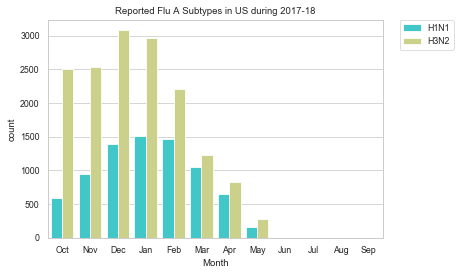

In [80]:
# Plots the records by month, starting with the beginning of the flu season in Oct 2017

order = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

sns.countplot(x='Month', data=df_fluA_Human, hue='Subtype', order = order, palette='rainbow').set_title('Reported Flu A Subtypes in US during 2017-18')

# relocate the legend
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad=0.)

### Partial answer to Question 2: For Flu A, the only reported subtypes are H1N1 and H3N2 with H3N2 being reported at higher rates. There is a peak of cases in Dec 2017 for H3N2 and Jan 2018 for H1N1.

As for the strains, there are a bunch reported:


In [81]:
df_fluA_Human["Strain_Name"].nunique()

2333

Because there are so many strains, a figure won't work, but we can list them to get an idea the most common. This may prove useful later when we need to look at exact sequences.

In [82]:
df_H1N1_strains = df_fluA_Human[df_fluA_Human["Subtype"] == "H1N1"]
H1N1_strains = df_H1N1_strains['Strain_Name'].value_counts().head(10)
df_H3N2_strains = df_fluA_Human[df_fluA_Human["Subtype"] == "H3N2"]
H3N2_strains = df_H3N2_strains['Strain_Name'].value_counts().head(10)

print("\033[1m" + "Most Common Strains per Subtype" + "\033[0m")
print("H1N1 strains:\n{}\n".format(H1N1_strains))
print("H3N2 strains:\n{}\n".format(H3N2_strains))


Most Common Strains per Subtype
H1N1 strains:
A/New Jersey/13/2018     32
A/New York/34/2017       24
A/Louisiana/62/2017      24
A/Iowa/34/2017           24
A/Illinois/37/2017       24
A/Louisiana/64/2017      24
A/Hawaii/54/2017         24
A/Virginia/36/2017       24
A/Connecticut/31/2017    24
A/Mississippi/35/2017    24
Name: Strain_Name, dtype: int64

H3N2 strains:
A/Kansas/14/2017         39
A/Wisconsin/04/2018      32
A/New York/53/2017       24
A/California/113/2017    24
A/Connecticut/32/2017    24
A/Missouri/33/2017       24
A/California/159/2017    24
A/Nevada/20/2017         24
A/Washington/308/2017    24
A/Wyoming/33/2017        24
Name: Strain_Name, dtype: int64



Now, lets perform the same analysis for Influenza Type B.

In [83]:
df_fluB_Human.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11281 entries, 0 to 11280
Data columns (total 14 columns):
Segment               11281 non-null int64
Protein_Name          11281 non-null object
Sequence_Accession    11281 non-null object
Complete_Genome       11281 non-null object
Segment_Length        11281 non-null int64
Subtype               11281 non-null object
Collection_Date       11281 non-null object
Host_Species          11281 non-null object
Country               11281 non-null object
State/Province        11281 non-null object
Flu_Season            11281 non-null object
Strain_Name           11281 non-null object
Curation_Report       11281 non-null object
Unnamed:_13           0 non-null float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.3+ MB


In [84]:
n_records = len(df_fluB_Human)
top5_states = df_fluB_Human['State/Province'].value_counts().head(5)
bottom5_states = df_fluB_Human['State/Province'].value_counts().tail(5)
n_uni_subtypes = df_fluB_Human['Subtype'].nunique()
uni_subtypes = df_fluB_Human['Subtype'].unique()

print("\033[1m" + "General Info" + "\033[0m")
print("Total number of flu B records: {}".format(n_records))
print("Top 5 states reporting Flu B:\n{}\n".format(top5_states))
print("Bottom 5 states reporting Flu B:\n{}\n".format(bottom5_states))
print("\033[1m" + "Subtype Details" + "\033[0m")
print("Number of unique subtypes reported: {}".format(n_uni_subtypes))
print("Those subtypes are: {}".format(uni_subtypes))

General Info
Total number of flu B records: 11281
Top 5 states reporting Flu B:
California    1096
Montana        408
Florida        398
Arizona        358
Wisconsin      339
Name: State/Province, dtype: int64

Bottom 5 states reporting Flu B:
District of Columbia    80
South Carolina          80
Kansas                  72
Rhode Island            48
Nevada                  24
Name: State/Province, dtype: int64

Subtype Details
Number of unique subtypes reported: 1
Those subtypes are: ['-N/A-']


Note that there is only one subtype reported, which is unnamed. We can still take a look at the montly reporting dates and most common strains.

In [85]:
df_fluB_Human = df_fluB_Human.copy()  
df_fluB_Human['Collection_Date'] = pd.to_datetime(df_fluB_Human['Collection_Date'])

In [86]:
# check the conversion
type(df_fluB_Human['Collection_Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [87]:
# Create a new column for just the month of each record. This will be the x-axis of my graph

df_fluB_Human['Month'] = df_fluB_Human['Collection_Date'].apply(lambda time: time.month)

In [88]:
# Looks like the month is an int, but I'd like it to read month names
import calendar

df_fluB_Human['Month'] = df_fluB_Human['Month'].apply(lambda x: calendar.month_abbr[x])

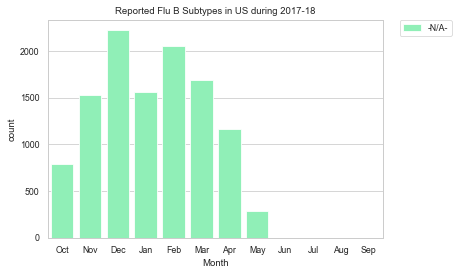

In [106]:
#Plots the records by month, starting with the beginning of the flu season in Oct 2017

order = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

sns.countplot(x='Month', data=df_fluB_Human, hue='Subtype', order = order, palette='rainbow').set_title('Reported Flu B Subtypes in US during 2017-18')

# relocate the legend
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad=0.)

Here's a look at just Flu B for the season. Although interesting to see how it compares to Flu A, it'd be nicer if we could get a look at Flu A and B together in one figure. Let's do that now.

In [90]:
df_AllFlu = pd.merge(df_fluA_Human, df_fluB_Human, how='outer')

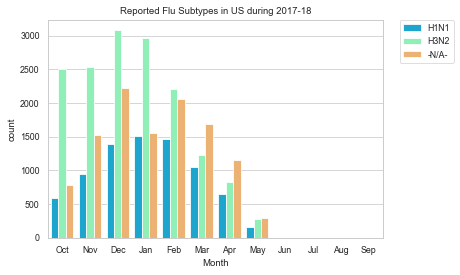

In [105]:
#Plotting out all three subtypes
order = ['Oct', 'Nov', 'Dec','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

sns.countplot(x='Month', data=df_AllFlu, hue='Subtype', order = order, palette='rainbow').set_title('Reported Flu Subtypes in US during 2017-18')

# relocate the legend
plt.legend(bbox_to_anchor = (1.05, 1), loc =2, borderaxespad=0.)

### Here is a cumulative look at all three subtypes: Flu A H1N1, Flu A H3N2, and Flu B 'N/A'. What's interesting is how Flu B persists during the end while Flu A is slowly waning out for the season.

Although these figures answer Question 2, it'd be fun to take it one step further and look at these data using a map.

First thing we have to do is convert the state names to abbreviations so they read into the map correctly.

Here's a dictionary of state names to abbreviations thanks to [rogerallen](https://gist.github.com/rogerallen/1583593)


In [92]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [107]:
# Now lets look at a map of collections per state, by subtype. First we have the sum the number of records by state.
# Should create a new dataframe with aggregate data by state. Want total number records, total number per subtype. Is this a pivot table?


df_byState = df_fluA_Human.groupby(by=['State/Province', 'Subtype']).size().reset_index(name='counts')



In [108]:
us_state_abbrev = {state: abbrev for abbrev, state in us_state_abbrev.items()}

df_byState['abbrev'] = df_byState['State/Province'].map(us_state_abbrev)
df_byState.head(5)

,State/Province,Subtype,counts,abbrev
0,Alabama,H1N1,232,AL
1,Alabama,H3N2,207,AL
2,Alaska,H1N1,208,AK
3,Alaska,H3N2,462,AK
4,Arizona,H1N1,216,AZ


Now going to plot it out on map

In [109]:
# install plotly and allow us to view inside the notebook

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [110]:
#Let's do H1N1 cases first.

#df_byState_H1N1 = df_byState_H1N1.copy()
df_byState_H1N1 = df_byState[df_byState['Subtype'] == 'H1N1']
df_byState_H1N1.head(5)

,State/Province,Subtype,counts,abbrev
0,Alabama,H1N1,232,AL
2,Alaska,H1N1,208,AK
4,Arizona,H1N1,216,AZ
6,Arkansas,H1N1,80,AR
8,California,H1N1,607,CA


In [111]:
data_H1N1 = dict(
        type = 'choropleth',
        colorscale = 'Greens',
        reversescale = True,
        locations = df_byState_H1N1['abbrev'],
        z = df_byState_H1N1['counts'],
        locationmode = 'USA-states',
        text = ['State/Province'],
        marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
        colorbar = {'title':'reported cases'}
            ) 

In [112]:
layout = dict(title = 'Reported/Sequenced Influenza H1N1 for 2017-2018',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [113]:
choromap = go.Figure(data = [data_H1N1],layout = layout)
iplot(choromap,validate=False)

In [114]:
# Here is a map for H3N2

df_byState_H3N2 = df_byState[df_byState['Subtype'] == 'H3N2']
df_byState_H3N2.head(5)

,State/Province,Subtype,counts,abbrev
1,Alabama,H3N2,207,AL
3,Alaska,H3N2,462,AK
5,Arizona,H3N2,392,AZ
7,Arkansas,H3N2,277,AR
9,California,H3N2,1621,CA


In [115]:
data_H3N2 = dict(
        type = 'choropleth',
        colorscale = 'Blues',
        reversescale = True,
        locations = df_byState_H3N2['abbrev'],
        z = df_byState_H3N2['counts'],
        locationmode = 'USA-states',
        text = ['State/Province'],
        marker = dict(line = dict(color = 'rgb(255,255,255)',width = 1)),
        colorbar = {'title':'reported cases'}
            ) 

In [116]:
layout = dict(title = 'Reported/Sequenced Influenza H3N2 for 2017-2018',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [118]:
choromap = go.Figure(data = [data_H3N2],layout = layout)
iplot(choromap,validate=False)

Now that there's a general idea of what this dataset holds, in my next analysis I will download sequences for analysis. To be continued...